# 🧠 FiftyOne Researcher Playground

👋 *By researchers, for researchers.*

This notebook demonstrates how to:

- Load diverse datasets (images, video, point clouds)
- Perform classification and detection tasks
- Use community and research plugins for advanced workflows
- Evaluate models and data quality

## 1️⃣ Install FiftyOne and Dependencies

In [4]:
!pip install fiftyone
!pip install torch torchvision torchaudio

  Using cached torch-2.7.1-cp39-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached torchvision-0.22.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.7.1-cp39-none-macosx_11_0_arm64.whl (68.6 MB)
Using cached torchvision-0.22.1-cp39-cp39-macosx_11_0_arm64.whl (1.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.3 MB/s eta 0:00:00ta 0:00:01
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached filelock-3.18.0-py3-none-any.whl (16 kB)
Using cached fsspec-2025.5.1-py3-none-any.whl (199 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [torchaudio]7 [torchaudio]]


## 2️⃣ Load Datasets

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz

/Users/adonaivera/Documents/fiftyone-researcher-playground/env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Images

100%|██████████| 9.91M/9.91M [00:15<00:00, 621kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 658kB/s]
100%|██████████| 1.65M/1.65M [00:05<00:00, 294kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.38MB/s]

   1% |/------------|    73/10000 [108.1ms elapsed, 14.7s remaining, 675.6 samples/s] 

 100% |█████████████| 10000/10000 [2.0s elapsed, 0s remaining, 5.4K samples/s]        
Dataset info written to '/Users/adonaivera/fiftyone/mnist/info.json'
Loading 'mnist' split 'test'
 100% |█████████████████| 100/100 [55.8ms elapsed, 0s remaining, 1.8K samples/s]   
Dataset 'mnist-test-100' created



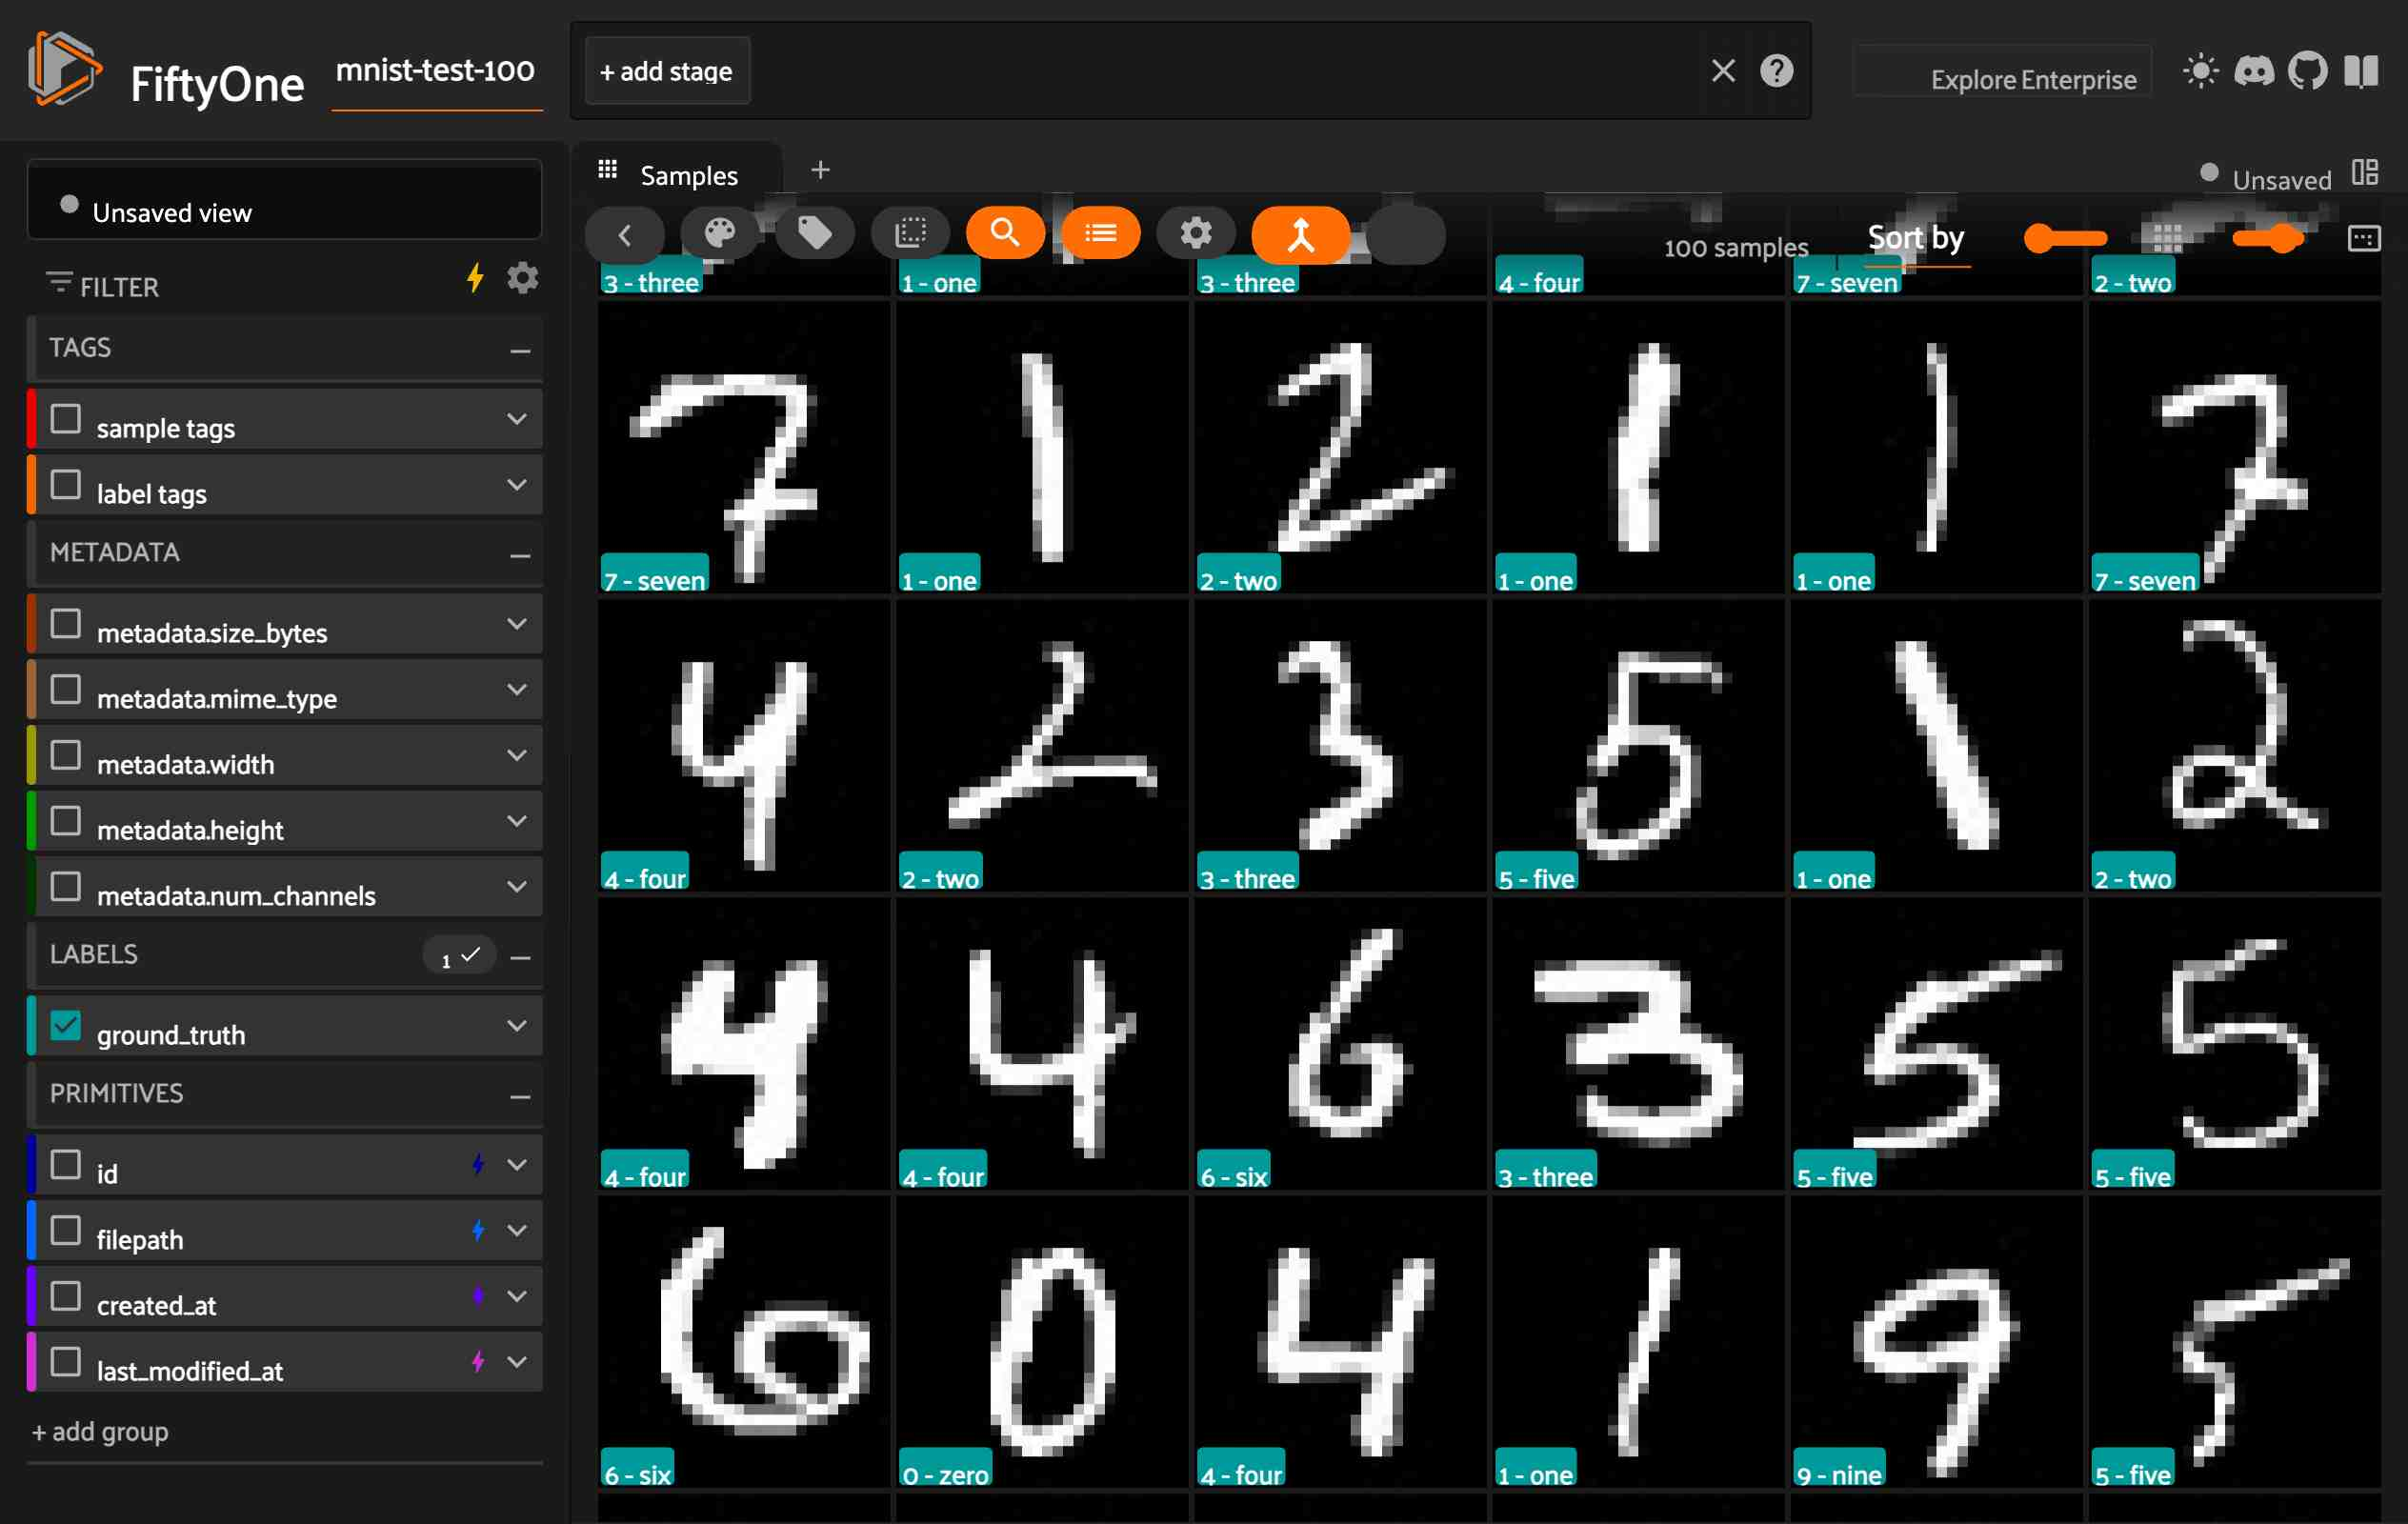


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v1.7.0

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Discord community 🚀🚀🚀
|  https://community.voxel51.com/
|



In [5]:
dataset = foz.load_zoo_dataset("mnist", split="test", max_samples=100)
session = fo.launch_app(dataset)

### Video

Dataset already downloaded
Loading 'quickstart-video'
 100% |███████████████████| 10/10 [4.4s elapsed, 0s remaining, 2.2 samples/s]      
Dataset 'quickstart-video' created



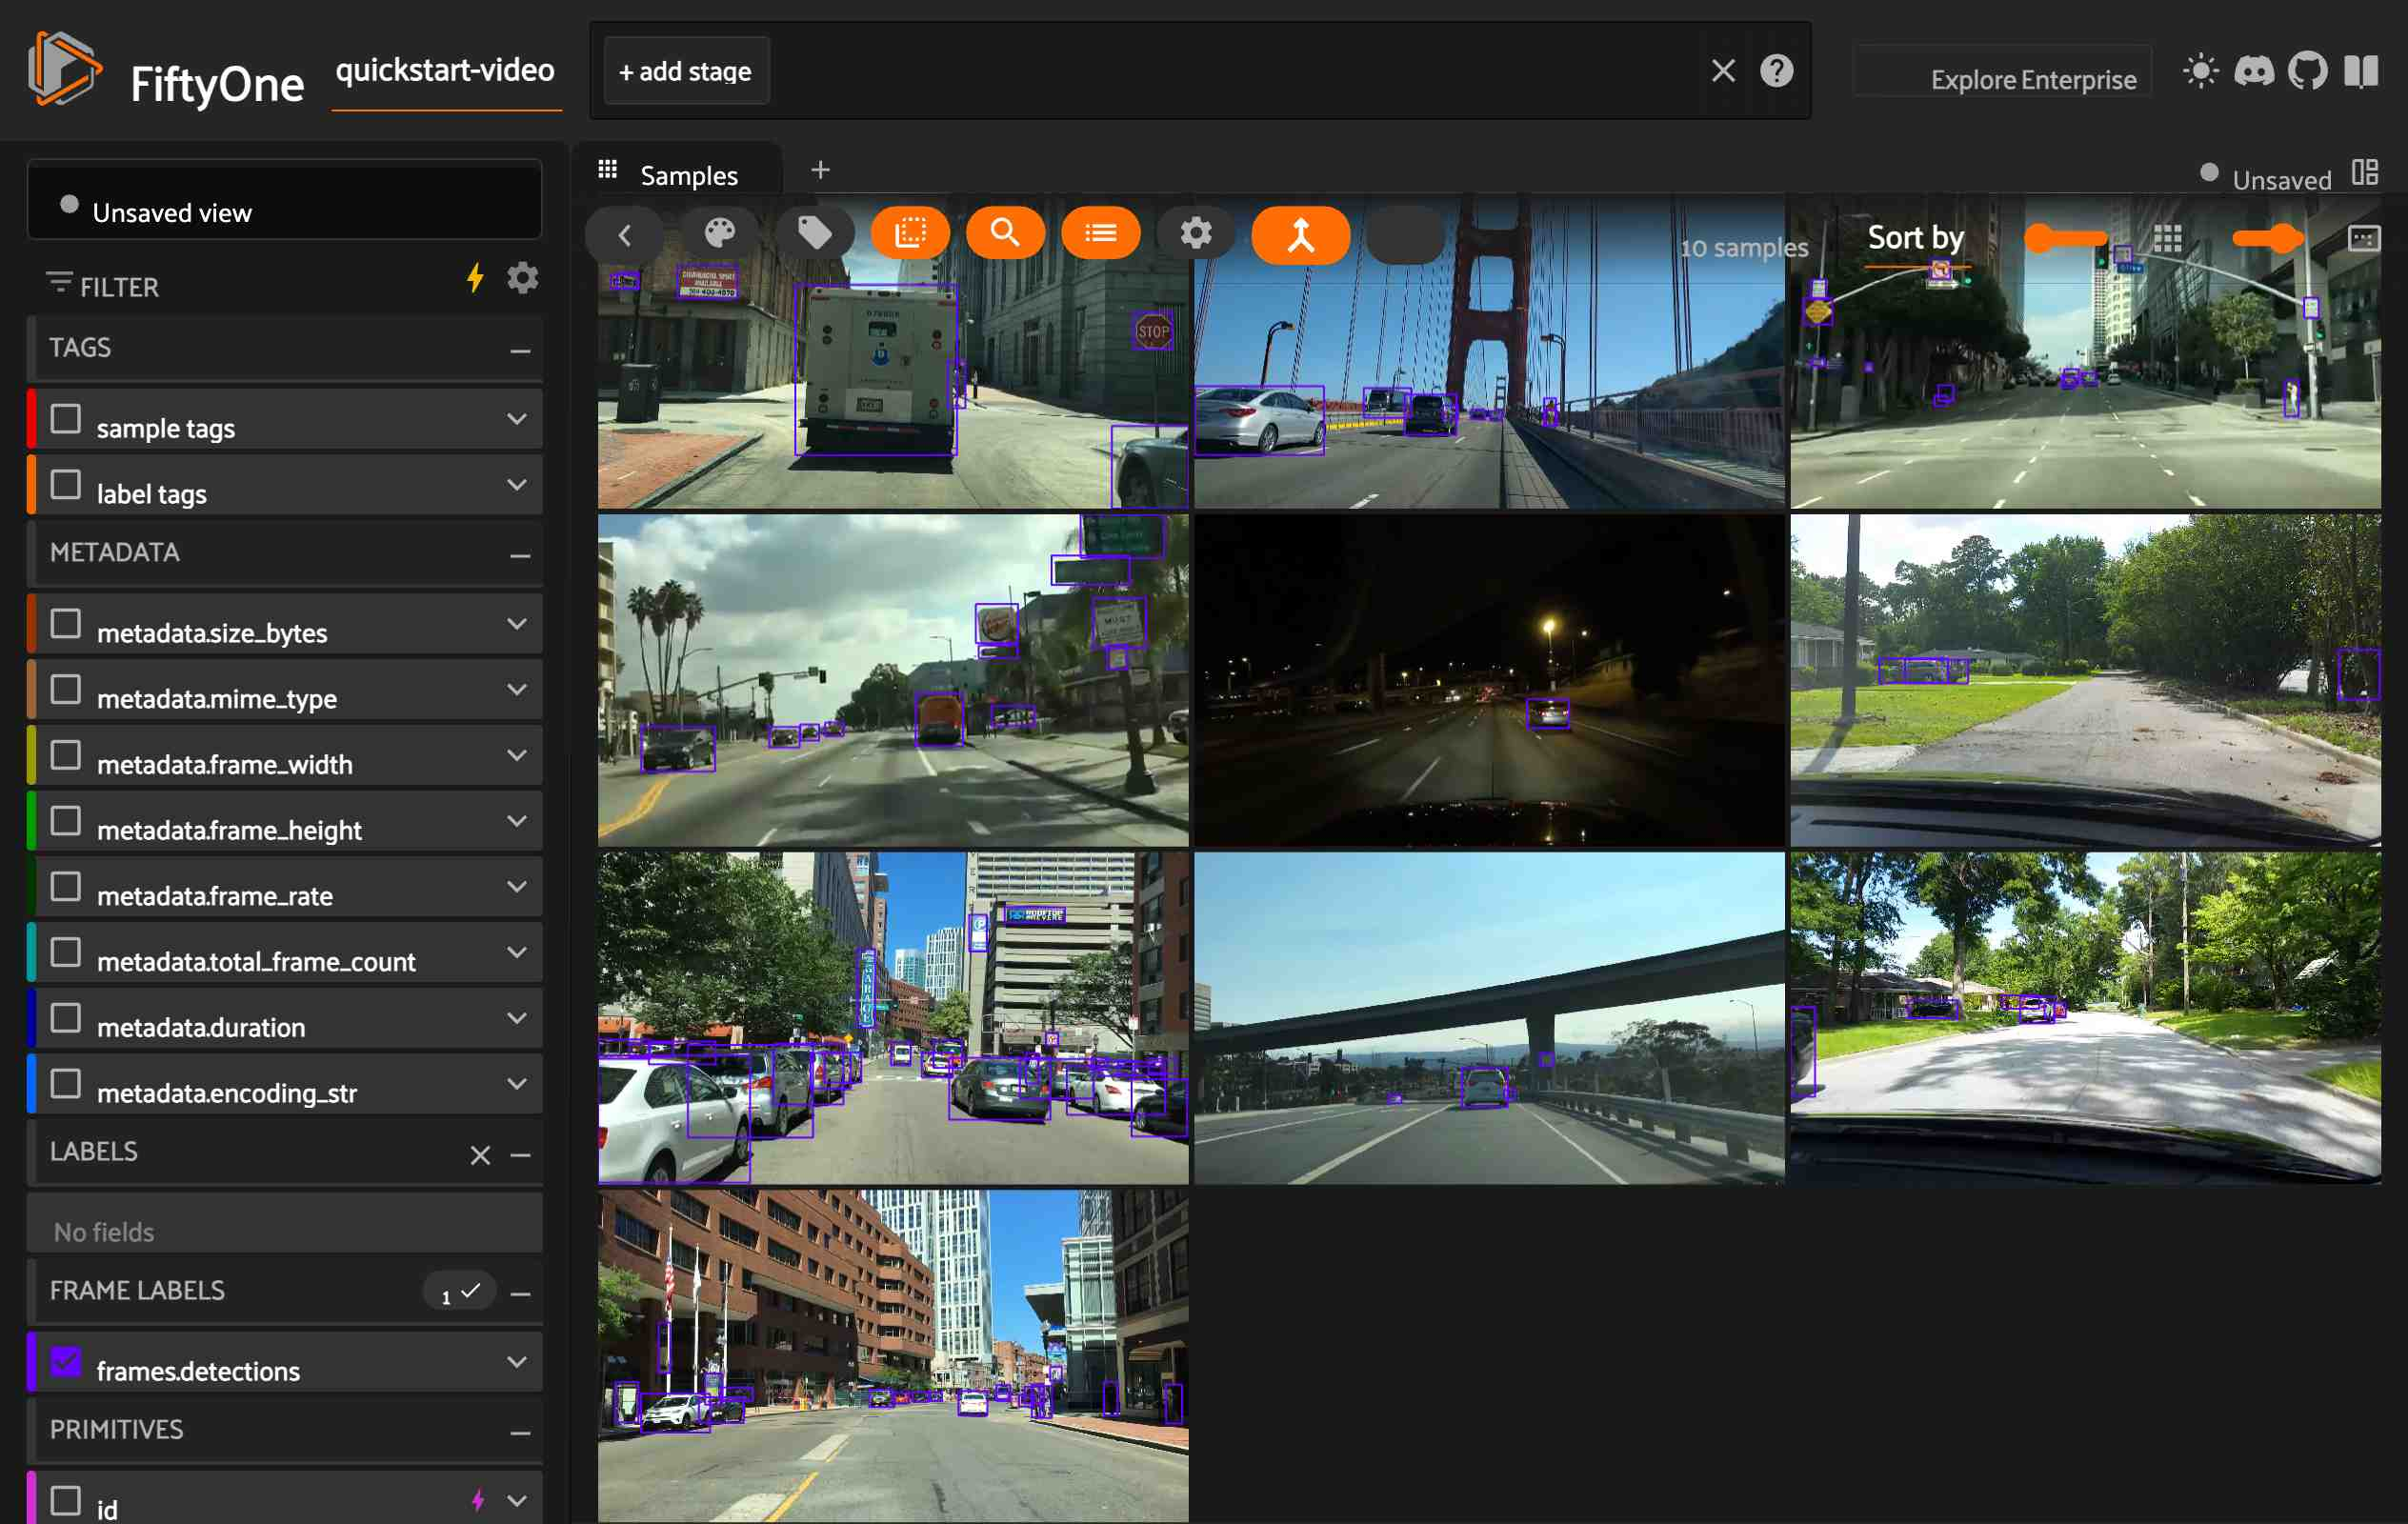

In [ ]:
video_dataset = foz.load_zoo_dataset("quickstart-video")
session = fo.launch_app(video_dataset)

### Point Cloud

In [ ]:
pc_dataset = foz.load_zoo_dataset("quickstart-groups")
session = fo.launch_app(pc_dataset)

 100% |██████|    4.5Gb/4.5Gb [1.2m elapsed, 0s remaining, 128.4Mb/s]      
Extracting dataset...
Parsing dataset metadata
Found 600 samples
Dataset info written to '/Users/adonaivera/fiftyone/quickstart-groups/info.json'
Loading 'quickstart-groups'
 100% |█████████████████| 600/600 [2.2s elapsed, 0s remaining, 279.2 samples/s]      
Dataset 'quickstart-groups' created


## 3️⃣ Perform Tasks

### Classification

In [ ]:
for sample in dataset:
    sample["predictions"] = fo.Classification(label="example_label")
    sample.save()
session.refresh()

### Object Detection

In [ ]:
coco_dataset = foz.load_zoo_dataset("coco-2017", split="validation", max_samples=50)
session = fo.launch_app(coco_dataset)

## 4️⃣ Plugin Integrations

Below are plugins you can activate in the App sidebar:

- **Image Quality Issues** (detect blur/noise)
- **Image Deduplication**
- **Semantic Document Search**
- **Visual Question Answering about your data**
- **Outlier Detection**
- **Sparse Concepts (Find Bias)** *(by Adonai)*
- **Validate VLM Efficiency** *(by Adonai)*
- **VoxelGPT** *(by Adonai)*

Example:

👉 **Activate Image Deduplication**:
- Open the FiftyOne App
- Click `Plugins` > `Image Deduplication`
- Run deduplication and view results

## 5️⃣ Evaluation Metrics

### Classification Metrics

In [ ]:
results = dataset.evaluate_classifications(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval"
)
print("Accuracy:", results.accuracy())

### Detection Metrics

In [ ]:
det_results = coco_dataset.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval"
)
print("mAP:", det_results.mAP())

## ✅ Conclusion

You now have a workflow to:
- Load datasets
- Visualize and explore data
- Perform ML tasks
- Integrate plugins to improve and analyze your data
- Evaluate models with metrics

🎓 *Built for researchers who want transparency, reproducibility, and flexibility.*